In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import math
from sklearn.metrics import silhouette_score

In [21]:
CREATEFINAL = False             # true creates the final dataframe, false reads a file
PRINTIMG=True             # true prints images and plots (requires plotted keograms to be downloaded)


dates = pd.read_csv('data/dates.csv')
dates = pd.to_datetime(dates['date']).dt.date.values

nlsdf = pd.read_csv('data/NLSdf.csv')
nlsdf['datetime'] = pd.to_datetime(nlsdf['datetime'])
nlsdf


,datetime,dN[cm],dE[cm],dNE[cm],HDOP,Sigma NE,Sigma N,Sigma E,asema
0,2019-01-16 06:10:00,21.500000,23.500000,31.800000,0.4,NaN,NaN,NaN,pasila
1,2019-01-16 06:30:00,12.000000,28.000000,30.500000,0.4,NaN,NaN,NaN,pasila
2,2019-01-16 06:45:00,33.200000,14.400000,36.200000,0.4,NaN,NaN,NaN,pasila
3,2019-01-16 06:50:00,37.700000,2.600000,37.800000,0.4,NaN,NaN,NaN,pasila
4,2019-01-16 06:55:00,35.000000,-1.225000,35.100000,0.4,NaN,NaN,NaN,pasila
...,...,...,...,...,...,...,...,...,...
28102,2023-05-07 15:50:00,-0.050000,-0.525000,0.550000,0.5,0.272500,0.240000,0.120000,joensuu
28103,2023-05-07 15:55:00,1.333333,-0.700000,1.466667,0.5,0.206667,0.170000,0.116667,pasila
28104,2023-05-07 15:55:00,0.100000,-0.433333,0.600000,0.5,0.326667,0.303333,0.110000,joensuu
28105,2023-05-07 16:00:00,1.475000,-0.450000,1.525000,0.5,0.245000,0.215000,0.117500,pasila


In [4]:
clusters = pd.read_csv('data/clusterdf.csv', sep=',')
clusters['dates'] = pd.to_datetime(clusters['dates'])

if CREATEFINAL:
    finaldf = pd.merge(nlsdf, clusters, how='inner', left_on=nlsdf['datetime'].dt.date, right_on=clusters['dates'].dt.date)
    finaldf = finaldf.drop(columns=['key_0', 'dates'])
    finaldf[list(clusters.columns[1:])] = finaldf[list(clusters.columns[1:])].astype('category')
    finaldf['date'] = finaldf['datetime'].dt.date

else:
    finaldf = pd.read_csv('data/finaldf.csv', sep=';')
    finaldf['datetime'] = pd.to_datetime(finaldf['datetime'])
    finaldf['date'] = pd.to_datetime(finaldf['date'])



finaldf


,datetime,dN[cm],dE[cm],dNE[cm],HDOP,Sigma NE,Sigma N,Sigma E,asema,k2,...,k8,k9,k10,k15,k25,k30,date,dNE_std,dNE_med,hairio
0,2019-01-16 06:10:00,21.500000,23.500000,31.800000,0.4,NaN,NaN,NaN,pasila,1,...,6,1,1,2,1,23,2019-01-16,31.563175,62.550000,False
1,2019-01-16 06:30:00,12.000000,28.000000,30.500000,0.4,NaN,NaN,NaN,pasila,1,...,6,1,1,2,1,23,2019-01-16,31.563175,62.550000,False
2,2019-01-16 06:45:00,33.200000,14.400000,36.200000,0.4,NaN,NaN,NaN,pasila,1,...,6,1,1,2,1,23,2019-01-16,31.563175,62.550000,False
3,2019-01-16 06:50:00,37.700000,2.600000,37.800000,0.4,NaN,NaN,NaN,pasila,1,...,6,1,1,2,1,23,2019-01-16,31.563175,62.550000,False
4,2019-01-16 06:55:00,35.000000,-1.225000,35.100000,0.4,NaN,NaN,NaN,pasila,1,...,6,1,1,2,1,23,2019-01-16,31.563175,62.550000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16806,2023-05-07 15:40:00,1.025000,-0.400000,1.075000,0.5,0.230000,0.162500,0.157500,pasila,0,...,1,8,3,11,8,29,2023-05-07,0.871178,0.933333,False
16807,2023-05-07 15:45:00,1.266667,-0.100000,1.300000,0.5,0.266667,0.230000,0.126667,pasila,0,...,1,8,3,11,8,29,2023-05-07,0.871178,0.933333,False
16808,2023-05-07 15:50:00,0.800000,-0.633333,1.033333,0.5,0.236667,0.186667,0.146667,pasila,0,...,1,8,3,11,8,29,2023-05-07,0.871178,0.933333,False
16809,2023-05-07 15:55:00,1.333333,-0.700000,1.466667,0.5,0.206667,0.170000,0.116667,pasila,0,...,1,8,3,11,8,29,2023-05-07,0.871178,0.933333,False


In [5]:

if CREATEFINAL:
    def select_station(group):
        counts = group['asema'].value_counts()
        if counts.get('joensuu', 0) > counts.get('pasila', 0):
            return group[group['asema'] == 'joensuu']
        else:
            return group[group['asema'] == 'pasila']

    finaldf = finaldf.groupby('date', group_keys=False).apply(select_station)
    finaldf['dNE_std'] = finaldf.groupby('date')['dNE[cm]'].transform('std')
    finaldf['dNE_med'] = finaldf.groupby('date')['dNE[cm]'].transform('median')
    finaldf.drop(columns=['date'])

In [6]:

filtdf = finaldf[(finaldf['dNE[cm]'] > 3)]
print(len(filtdf)/len(finaldf)*100, '%', len(filtdf), len(finaldf))

hairiot = list(filtdf['datetime'].dt.date.unique())
print(len(hairiot)/len(clusters)*100, '%', len(hairiot))

14.210933317470703 % 2389 16811
46.043165467625904 % 64


In [7]:
# bin_edges = pd.cut(finaldf['dNE[cm]'], bins=10, retbins=True)[1]
# print(bin_edges[1])

filtdf = finaldf[(finaldf['dNE[cm]'] > 3) & (finaldf['dNE_med'] < 2)]#bin_edges[1]]
print(len(filtdf)/len(finaldf)*100, '%')

hairiot = list(filtdf['datetime'].dt.date.unique())
print(len(hairiot)/len(clusters)*100, '%')

2.135506513592291 %
29.496402877697843 %


In [8]:
finaldf.loc[finaldf['datetime'].dt.date == dt.date(2023,3,21)].max()

datetime    2023-03-21 16:00:00
dN[cm]                      1.5
dE[cm]                     -0.1
dNE[cm]                1.633333
HDOP                        0.7
Sigma NE               0.386667
Sigma N                    0.31
Sigma E                    0.27
asema                    pasila
k2                            0
k3                            0
k4                            3
k5                            0
k6                            3
k7                            0
k8                            1
k9                            8
k10                           3
k15                          14
k25                          13
k30                          15
date        2023-03-21 00:00:00
dNE_std                0.292759
dNE_med                1.066667
hairio                    False
dtype: object

In [9]:
# bin_edges = pd.cut(finaldf['dNE_med'], bins=10, retbins=True)[1]
# print(bin_edges[1])
# filtdf = finaldf[finaldf['dNE_med'] < 2]#bin_edges[1]]
# print(len(filtdf)/len(finaldf)*100, '%')

# hairiot = list(filtdf['datetime'].dt.date.unique())
# print(len(hairiot)/len(clusters)*100, '%')

In [10]:
#finaldf.loc[finaldf['datetime'].dt.date == dt.date(2019,8,20)]

In [11]:

# # Convert 'asema' to categorical codes for coloring
# filtdf['asema_code'] = filtdf['asema'].astype('category').cat.codes

# # Create scatter plot
# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(
#     filtdf['datetime'],
#     filtdf['dNE[cm]'],
#     alpha=0.7,
#     c=filtdf['asema_code'],
#     cmap='tab10'
# )

# # Create legend using unique 'asema' values
# handles, _ = scatter.legend_elements(prop="colors", alpha=0.9)
# labels = filtdf['asema'].astype('category').cat.categories
# plt.legend(handles, labels, title="asema")

# # Label axes and show plot
# plt.xlabel('Datetime')
# plt.ylabel('dNE[cm]')
# plt.title('Scatter Plot of dNE[cm] over Time by Station')
# plt.tight_layout()
# plt.show()


In [12]:
clusters['hairio'] = clusters['dates'].dt.date.isin(hairiot)
finaldf['hairio'] = finaldf['datetime'].dt.date.isin(hairiot)
paivat = clusters['dates'].dt.date
neghairiot = list(clusters.loc[~clusters['hairio']]['dates'].dt.date)

In [171]:

if PRINTIMG:
    #i=0
    anomaly_day = hairiot[i]

    # Filter data for that day
    day_data = finaldf[finaldf['datetime'].dt.date == anomaly_day]

    # Build image path
    image_path = f"data/og/{anomaly_day}og.png"

    # Create side-by-side plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot dNE[cm]
    axes[0].plot(day_data['datetime'], day_data['dNE[cm]'])
    axes[0].set_title(f'dNE[cm] on {anomaly_day}')
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('dNE[cm]')
    axes[0].tick_params(axis='x', rotation=45)

    # Show image if it exists
    if os.path.exists(image_path):
        img = mpimg.imread(image_path)
        axes[1].imshow(img)
        axes[1].axis('off')
        axes[1].set_title(f'Image for {anomaly_day}')
    else:
        axes[1].text(0.5, 0.5, 'Image not found', ha='center', va='center')
        axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # Progress print
    i += 1
    print(i)

IndexError: list index out of range

In [14]:
if PRINTIMG:

    i=0
    ks = [2,3,4,5,6,7,8,9,10,15,25,30]
    k=ks[i]
    x_col = f'k{k}'

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each group separately to apply different alpha values
    for hairio_value, group in clusters.groupby('hairio'):
        ax.scatter(
            group['dates'],
            group[x_col],
            color='black' if hairio_value else 'green',
            alpha=1.0 if hairio_value else 0.5,
            label= f'Anomaly day' if hairio_value else 'Regular day'
        )

    # Add grid and legend
    ax.grid(True)
    ax.legend()


    ax.set_yticks(range(0, k))


    # Add labels and title
    plt.title(f'Scatter plot of regular days and anomaly days of each cluster \n Number of clusters k={k}')
    plt.ylabel('Cluster number')
    plt.xlabel('Year and month')
    plt.tight_layout()
    #plt.savefig(f'data/klusteriscatter/klusteriscatter{i}.png')
    plt.show()

    i+=1


In [15]:
clusdict={
    'k2': [1,0],
    'k4': [0,3],
    'k6': [1,3],
    'k7': [1,0],
    'k8': [6,1],
    'k9': [1,8],
    'k10': [1,3],
    'k25': [1,24],
    'k30': [23,14]
    }

In [16]:
if PRINTIMG:

    a=0

    asd=list(clusdict.keys())[a]

    klabel = clusdict[asd][1]

    kdates = np.where(clusters[asd].values == klabel)[0]
    n_images = len(kdates)
    print(f"K={asd}, Cluster {klabel}: {n_images} heatmaps")

    n_cols = 5
    n_rows = math.ceil(n_images / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2*n_rows))
    axes = axes.flatten()

    for axj, idx in enumerate(kdates):
        kdate = clusters['dates'][idx].date()
        image_path = f"data/og/{kdate}og.png"
        
        if os.path.exists(image_path):
            ax = axes[axj]
            img = mpimg.imread(image_path)
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f'Image for {kdate}')

        else:
            ax.text(0.5, 0.5, 'Image not found', ha='center', va='center')
            ax.axis('off')

    for kj in range(axj+1, len(axes)):
        axes[kj].axis('off')

    fig.suptitle(f'K={asd}, cluster {klabel}', fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    a+=1

# for klabel in kvalues:

#     kdates = np.where(clusters['k2'].values == klabel)[0]
#     n_images = len(kdates)
#     print(f"Cluster {klabel}: {n_images} heatmaps")

#     n_cols = 5
#     n_rows = math.ceil(n_images / n_cols)
#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2*n_rows))
#     axes = axes.flatten()

#     for axj, idx in enumerate(kdates):
#         kdate = clusters['dates'][idx].date()
#         image_path = f"data/og/{kdate}og.png"
        
#         if os.path.exists(image_path):
#             ax = axes[axj]
#             img = mpimg.imread(image_path)
#             ax.imshow(img)
#             ax.axis('off')
#             ax.set_title(f'Image for {anomaly_day}')

#         else:
#             ax.text(0.5, 0.5, 'Image not found', ha='center', va='center')
#             ax.axis('off')

#     for kj in range(axj+1, len(axes)):
#         axes[kj].axis('off')

#     fig.suptitle(f'Cluster {klabel}', fontsize=16)
#     fig.tight_layout(rect=[0, 0, 1, 0.96])
#     plt.show()


In [17]:
stats = {}
hairioidt = np.array(np.where(clusters['hairio'])[0])
tokisotidt = {}


for k in ['k2','k3','k4','k5','k6','k7','k8','k9','k10','k15','k25','k30']:
    jakauma = clusters[k]
    #ntot = len(jakauma)
    kvalues, kcounts = np.unique(jakauma, return_counts=True)
    isoinid, tokisoinid = kcounts.argsort()[-2:][::-1]
    nisoin, ntokisoin = sorted(kcounts, reverse=True)[0:2]
    
    hairiokidt = list(jakauma[hairioidt])
    #hairiokvalues, hairiokcounts = np.unique(hairiokidt, return_counts=True)
    hairionisoin = hairiokidt.count(isoinid)
    hairiontokisoin = hairiokidt.count(tokisoinid)


    tokisotidt[k] = tokisoinid
    stats[k] = [hairionisoin, hairionisoin/nisoin*100, hairiontokisoin, hairiontokisoin/ntokisoin*100]

stats = pd.DataFrame(stats, 
                     columns=list(stats.keys()), 
                     index=['# largest', '%'+' largest', '# 2nd largest', '%'+' 2nd largest']
                     )
stats = stats.round(1)

stats

,k2,k3,k4,k5,k6,k7,k8,k9,k10,k15,k25,k30
# largest,31.0,39.0,25.0,38.0,27.0,30.0,19.0,23.0,28.0,27.0,17.0,22.0
% largest,27.0,28.5,23.1,28.1,25.0,26.5,22.1,24.2,25.2,25.5,22.4,24.7
# 2nd largest,10.0,1.0,14.0,1.0,7.0,9.0,8.0,11.0,7.0,2.0,5.0,5.0
% 2nd largest,41.7,100.0,48.3,100.0,35.0,42.9,32.0,32.4,36.8,25.0,23.8,38.5


In [18]:
tokisotidt

{'k2': 0,
 'k3': 2,
 'k4': 3,
 'k5': 4,
 'k6': 3,
 'k7': 0,
 'k8': 0,
 'k9': 8,
 'k10': 3,
 'k15': 9,
 'k25': 24,
 'k30': 14}

In [19]:
g=0
g+=1
kid = list(tokisotidt.keys())[g]
print(kid)
clusters.loc[clusters[kid]==tokisotidt[kid]]




k3


,dates,k2,k3,k4,k5,k6,k7,k8,k9,k10,k15,k25,k30,hairio
119,2022-10-09,0,2,1,1,3,0,1,5,3,7,5,8,True


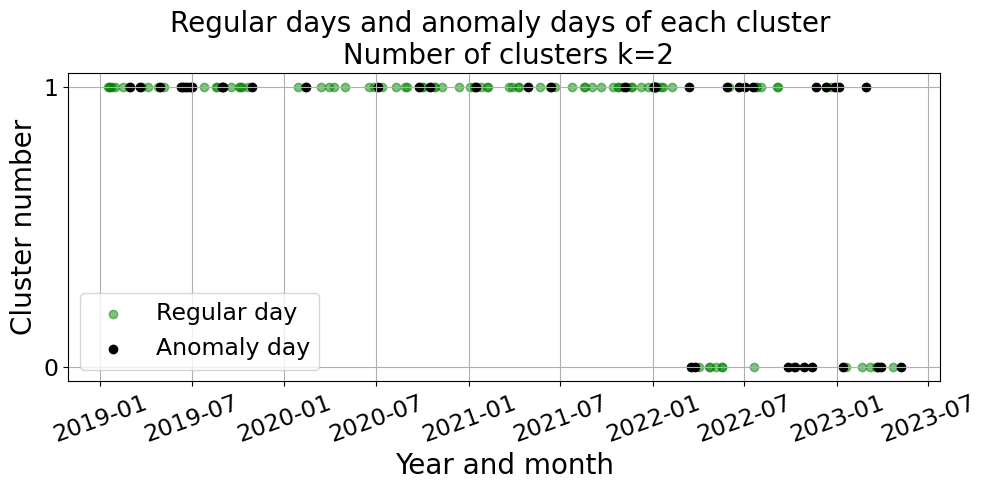

In [20]:
i=0
k=int(list(tokisotidt.keys())[i][1:])
x_col = f'k{k}'
font_size=20

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot each group separately to apply different alpha values
for hairio_value, group in clusters.groupby('hairio'):
    ax.scatter(
        group['dates'],
        group[x_col],
        color='black' if hairio_value else 'green',
        alpha=1.0 if hairio_value else 0.5,
        label= f'Anomaly day' if hairio_value else 'Regular day'
    )

# Add grid and legend
ax.grid(True)
ax.legend(fontsize=font_size-3)


ax.set_yticks(range(0, k))


# Add labels and title
plt.title(f'Regular days and anomaly days of each cluster \n Number of clusters k={k}', fontsize=font_size)
plt.ylabel('Cluster number', fontsize=font_size)
plt.xlabel('Year and month', fontsize=font_size)
plt.xticks(fontsize=font_size-3, rotation=20)
plt.yticks(fontsize=font_size-3)

plt.tight_layout()
plt.savefig(f'data/klusteriscatter/klusteriscatter{i}.png')
plt.show()

i+=1